# **TAREA MÓDULO 42 - Daniel Ortega**

El siguiente proyecto es un modelo de Machine Learning para predecir. Utilizaremos un DataFrame de un Banco que hemos a lo largo del curso.

____
# **I** - EDA

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os
import requests

In [81]:
os.chdir(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\48_Módulo_42_Introducción_Machine_Learnin_II')

In [82]:
df = pd.read_csv(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\48_Módulo_42_Introducción_Machine_Learnin_II\bank-full.csv', sep=';')

In [83]:
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
5912,35,technician,married,secondary,no,23,yes,no,unknown,26,may,147,1,-1,0,unknown,no
11122,36,unemployed,divorced,secondary,no,8267,no,no,unknown,18,jun,321,2,-1,0,unknown,no
30132,37,technician,divorced,secondary,no,-24,yes,no,cellular,4,feb,33,2,-1,0,unknown,no


In [84]:
columnas = df.columns

for i in columnas:
    print(f'Columna: {i} - Tipo de dato: {df[i].dtype} - Valores únicos: {df[i].nunique()}')

Columna: age - Tipo de dato: int64 - Valores únicos: 77
Columna: job - Tipo de dato: object - Valores únicos: 12
Columna: marital - Tipo de dato: object - Valores únicos: 3
Columna: education - Tipo de dato: object - Valores únicos: 4
Columna: default - Tipo de dato: object - Valores únicos: 2
Columna: balance - Tipo de dato: int64 - Valores únicos: 7168
Columna: housing - Tipo de dato: object - Valores únicos: 2
Columna: loan - Tipo de dato: object - Valores únicos: 2
Columna: contact - Tipo de dato: object - Valores únicos: 3
Columna: day - Tipo de dato: int64 - Valores únicos: 31
Columna: month - Tipo de dato: object - Valores únicos: 12
Columna: duration - Tipo de dato: int64 - Valores únicos: 1573
Columna: campaign - Tipo de dato: int64 - Valores únicos: 48
Columna: pdays - Tipo de dato: int64 - Valores únicos: 559
Columna: previous - Tipo de dato: int64 - Valores únicos: 41
Columna: poutcome - Tipo de dato: object - Valores únicos: 4
Columna: y - Tipo de dato: object - Valores ún

In [85]:
for i in columnas:
    print('\n')
    print(f'{i} {df[i].unique()}')



age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]


job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


marital ['married' 'single' 'divorced']


education ['tertiary' 'secondary' 'unknown' 'primary']


default ['no' 'yes']


balance [ 2143    29     2 ...  8205 14204 16353]


housing ['yes' 'no']


loan ['no' 'yes']


contact ['unknown' 'cellular' 'telephone']


day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]


month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


duration [ 261  151   76 ... 1298 1246 1556]


campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 

In [86]:
df.shape

(45211, 17)

## **INSIGHTS**

Lo que tenemos es una base de datos de un banco con diferente información y características de los clientes. La pregunta más importante y lo que el modelo quiere contestar es: **¿Voy a obtener respuesta a una campaña de marketing?**

- Tenemos un DataFrame de 45,211 líneas por 17 columnas.
- Los tipos de datos son correctos, los numéricos son int y los textos los tenemos como object.
- La columna de 'Y' no sabemos a qué hace referencia. Tal vez podemos eliminarla.
    - *No vamos a eliminarla, ya que está columna responde a la pregunta principal del problema. Ese error se cometió y por eso falló el modelo la primera vez que lo hice.*
- la columna de 'Default' tampoco sabemos a qué hace refrencia. Tal vez podemos eliminarla.
    - *Tampoco vamos a eliminarla en esta ocasión, al menos no ahora, vamos a revisar su colinealidad con otra variable y entonces decidimos si eliminarla o no.*

____
# **II** - Field Engineering

*Vamos a eliminar las columnas que no sabemos para qué sirven o a qué hacen referencia*. No lo haremos.

In [87]:
#df.drop(columns=['y', 'default'], inplace=True)

In [88]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [89]:
print(pd.api.types.is_numeric_dtype(df['age']))
print(pd.api.types.is_numeric_dtype(df['balance']))
print(pd.api.types.is_numeric_dtype(df['day']))
print(pd.api.types.is_numeric_dtype(df['duration']))
print(pd.api.types.is_numeric_dtype(df['campaign']))
print(pd.api.types.is_numeric_dtype(df['pdays']))
print(pd.api.types.is_numeric_dtype(df['previous']))

True
True
True
True
True
True
True


**Insight**

- No tenemos valores nulos o valores vacios

In [90]:
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45035,47,admin.,married,secondary,no,3676,no,no,cellular,18,oct,567,1,95,3,success,yes
24952,45,unemployed,divorced,secondary,no,728,yes,yes,cellular,18,nov,107,1,-1,0,unknown,no
32403,39,blue-collar,married,primary,no,2366,yes,no,cellular,16,apr,1007,3,325,4,failure,no


In [91]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.94,10.62,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.27,3044.77,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.81,8.32,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.16,257.53,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.76,3.10,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.20,100.13,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.58,2.30,0.0,0.0,0.0,0.0,275.0


_____
# **III** - Visualización Básica

In [92]:
len(df.columns)

17

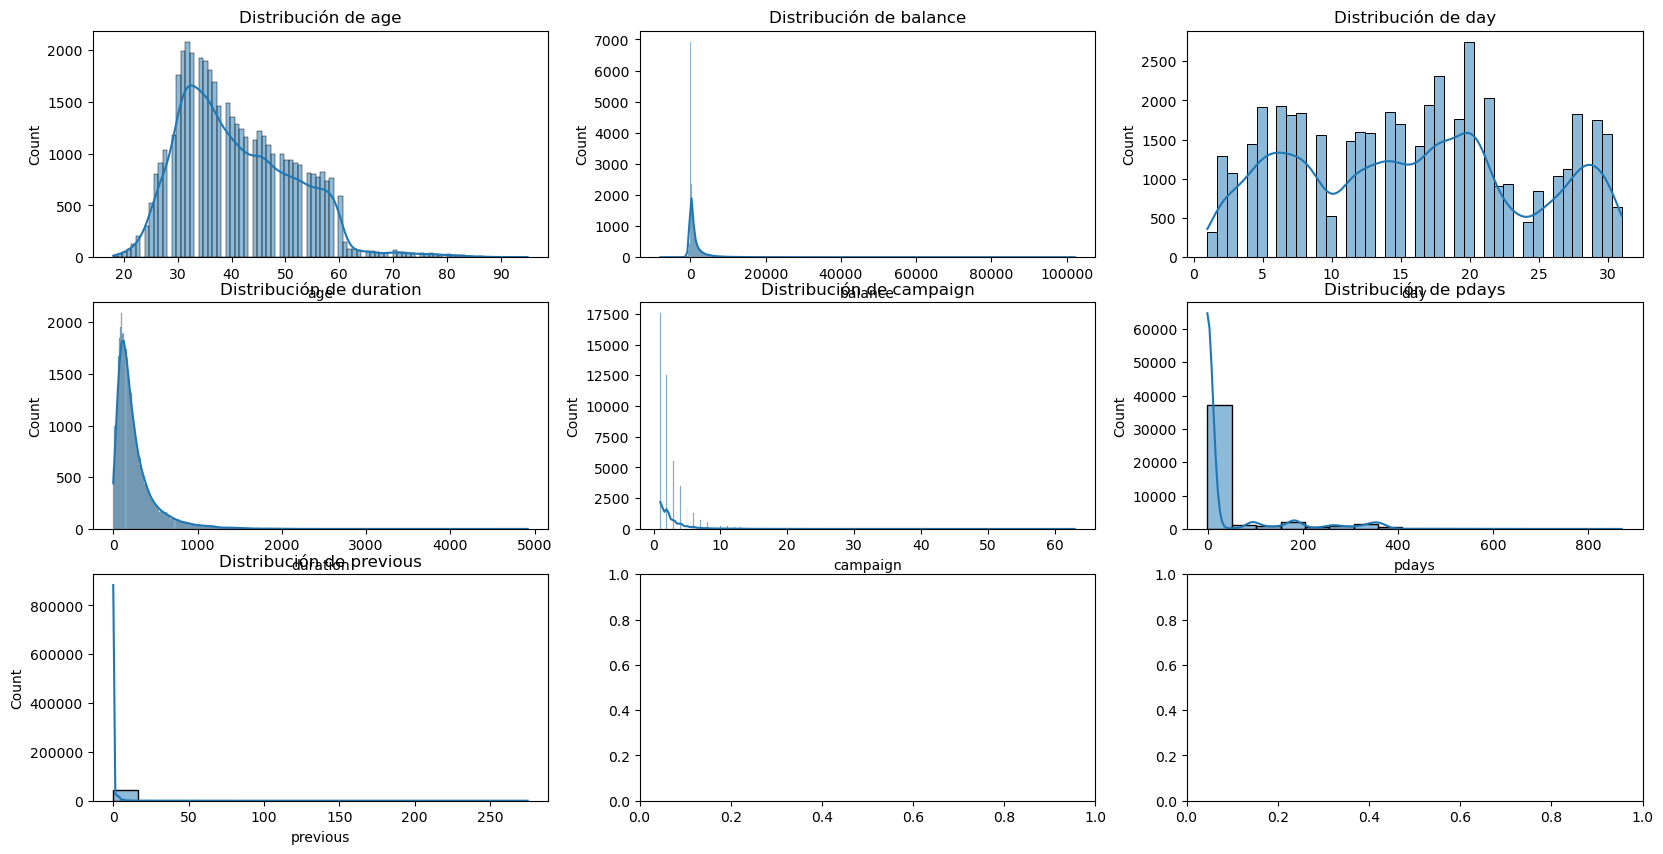

In [93]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
for i, col in enumerate(df.select_dtypes(include=['int64']).columns):
    ax = axes[i // 3, i % 3]
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(f'Distribución de {col}')

## **Insights**

- Los campos de 'Previous', 'Campaign', 'Pdays', 'Duration', y 'Balance', tienen sesgos muy marcados a la derecha, por lo que podemos calcular sus logaritmos. 

In [94]:
df_numeric = df.select_dtypes(include=['int64'])
df_numeric.corr().round(2)

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


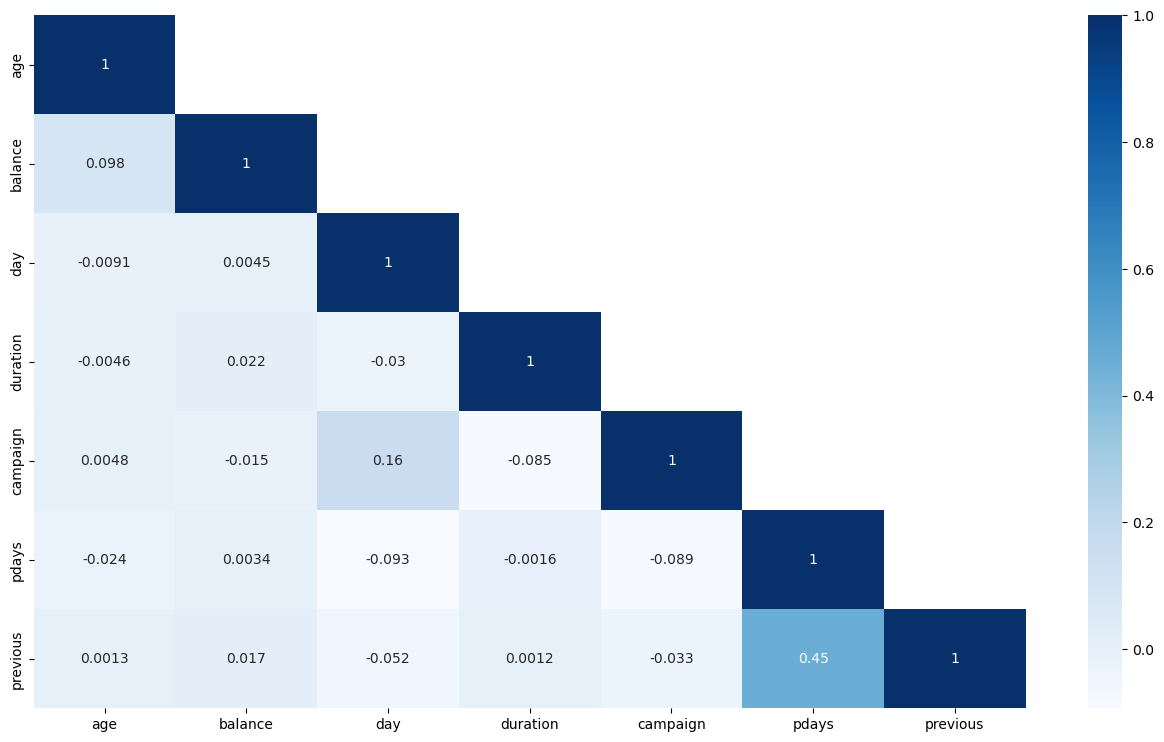

In [95]:
plt.figure(figsize=(16, 9))

corr_df = df_numeric.corr(method='pearson')

# Crear máscara triangular inferior
mask = np.tril(np.ones(corr_df.shape), k=0).astype(bool)

# Aplicar máscara
df_lt = corr_df.where(mask)

# Graficar
sns.heatmap(df_lt, cmap='Blues', annot=True)
plt.show()

## **Insights** 

- No tenemos ninguna variable que debamos eliminar por ser muy alta su correlación con otra. 
- La más alta es de pdays con previous con un 45%.

____
# **IV** - Análisis Bivariado

In [96]:
def grafica_corr(x):
    return df.groupby(x)[df.select_dtypes(include='number').columns].mean().round(2).T

In [97]:
x = 'loan'
grafica_corr(x)

loan,no,yes
age,41.01,40.56
balance,1474.45,774.31
day,15.77,16.02
duration,259.56,250.85
campaign,2.75,2.83
pdays,41.19,34.98
previous,0.59,0.52


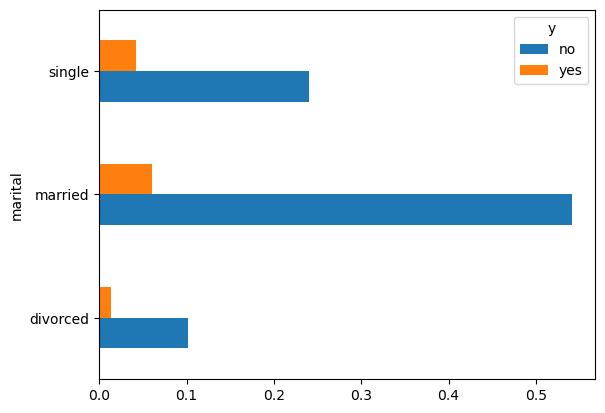

In [98]:
ct = pd.crosstab(df['marital'], df['y'], normalize=True).plot.barh(stacked=False)

____
# **V** - Balance de Clases

In [99]:
categ_columns = df.select_dtypes(include=['object']).columns
for column in categ_columns:
    print('\n'+ column)
    print(df[column].value_counts())


job
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

marital
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

education
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

default
default
no     44396
yes      815
Name: count, dtype: int64

housing
housing
yes    25130
no     20081
Name: count, dtype: int64

loan
loan
no     37967
yes     7244
Name: count, dtype: int64

contact
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

month
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count

## **Insights**

- La columna de 'job' tiene dos conceptos de 'student' y 'unkown' que tienen un 2% de representación cada uno. Podemos juntarlos y hacer una sola categoría llamada 'others'. 
- Debemos documentar que estas columnas se van a unir y que porcentaje de representación tiene cada una actualmente y por qué las vamos a unir en una sola categoría.

In [100]:
df['job'] = df['job'].replace({'student': 'others', 'unknown': 'others'})

In [101]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'others', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid'], dtype=object)

____
# **VI** - Preparación antes del Split

In [102]:
df2 = df.copy()

In [103]:
print(df2['education'].unique())
print(df2['marital'].unique())
print(df2['housing'].unique())
print(df2['job'].unique())
print(df2['loan'].unique())
print(df2['y'].unique())
print(df2['default'].unique())



df2['education'] = df2['education'].astype('category')
df2['marital'] = df2['marital'].astype('category')
df2['housing'] = df2['housing'].astype('category')
df2['job'] = df2['job'].astype('category')
df2['loan'] = df2['loan'].astype('category')
df2['y'] = df2['y'].astype('category')
df2['default'] = df2['default'].astype('category')

['tertiary' 'secondary' 'unknown' 'primary']
['married' 'single' 'divorced']
['yes' 'no']
['management' 'technician' 'entrepreneur' 'blue-collar' 'others' 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid']
['no' 'yes']
['no' 'yes']
['no' 'yes']


In [104]:
df2['previous_log'] = np.log1p(df2['previous']+1)
df2['campaign_log'] = np.log1p(df2['campaign']+1)
df2['pdays_log'] = np.log1p(df2['pdays']+1)
df2['duration_log'] = np.log1p(df2['duration']+1)
df2['balance_log'] = np.log1p(df2['balance']+1)

c:\Users\danielortega\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\danielortega\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [105]:
df2.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,previous_log,campaign_log,pdays_log,duration_log,balance_log
12866,59,blue-collar,divorced,primary,no,1265,no,yes,cellular,7,...,1,-1,0,unknown,yes,0.693147,1.098612,0.000000,6.746412,7.144407
22136,45,blue-collar,married,secondary,no,13156,no,no,cellular,21,...,4,-1,0,unknown,no,0.693147,1.791759,0.000000,4.158883,9.484785
25414,31,management,married,tertiary,no,1164,yes,yes,cellular,18,...,2,123,3,failure,no,1.609438,1.386294,4.828314,4.962845,7.061334


<Axes: >

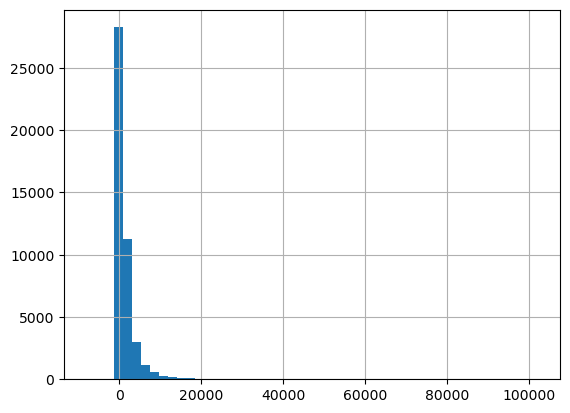

In [106]:
df['balance'].hist(bins=50)

**Insight**

- Tenemos un desbalanceo en 'balance' con un valor único arriba de los 10,000

In [116]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'previous_log', 'campaign_log',
       'pdays_log', 'duration_log', 'balance_log', 'balance_scaled'],
      dtype='object')

In [124]:
df2.isna().sum()

age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
previous_log      0
campaign_log      0
pdays_log         0
duration_log      0
balance_scaled    0
dtype: int64

In [125]:
df2.drop(columns=['balance_log'], inplace=True)

KeyError: "['balance_log'] not found in axis"

In [127]:
print(pd.api.types.is_numeric_dtype(df2['previous_log']))
print(pd.api.types.is_numeric_dtype(df2['campaign_log']))
print(pd.api.types.is_numeric_dtype(df2['pdays_log']))
print(pd.api.types.is_numeric_dtype(df2['duration_log']))
#print(pd.api.types.is_numeric_dtype(df2['balance_log'])) fue eliminada
print(pd.api.types.is_numeric_dtype(df2['balance_scaled']))

True
True
True
True
True


In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2['balance_scaled'] = scaler.fit_transform(df2[['balance']])

In [129]:
print('Lista de columnas:')
print('________________________')
for col in df2.columns:
    print(col)

Lista de columnas:
________________________
age
job
marital
education
default
balance
housing
loan
contact
day
month
duration
campaign
pdays
previous
poutcome
y
previous_log
campaign_log
pdays_log
duration_log
balance_scaled


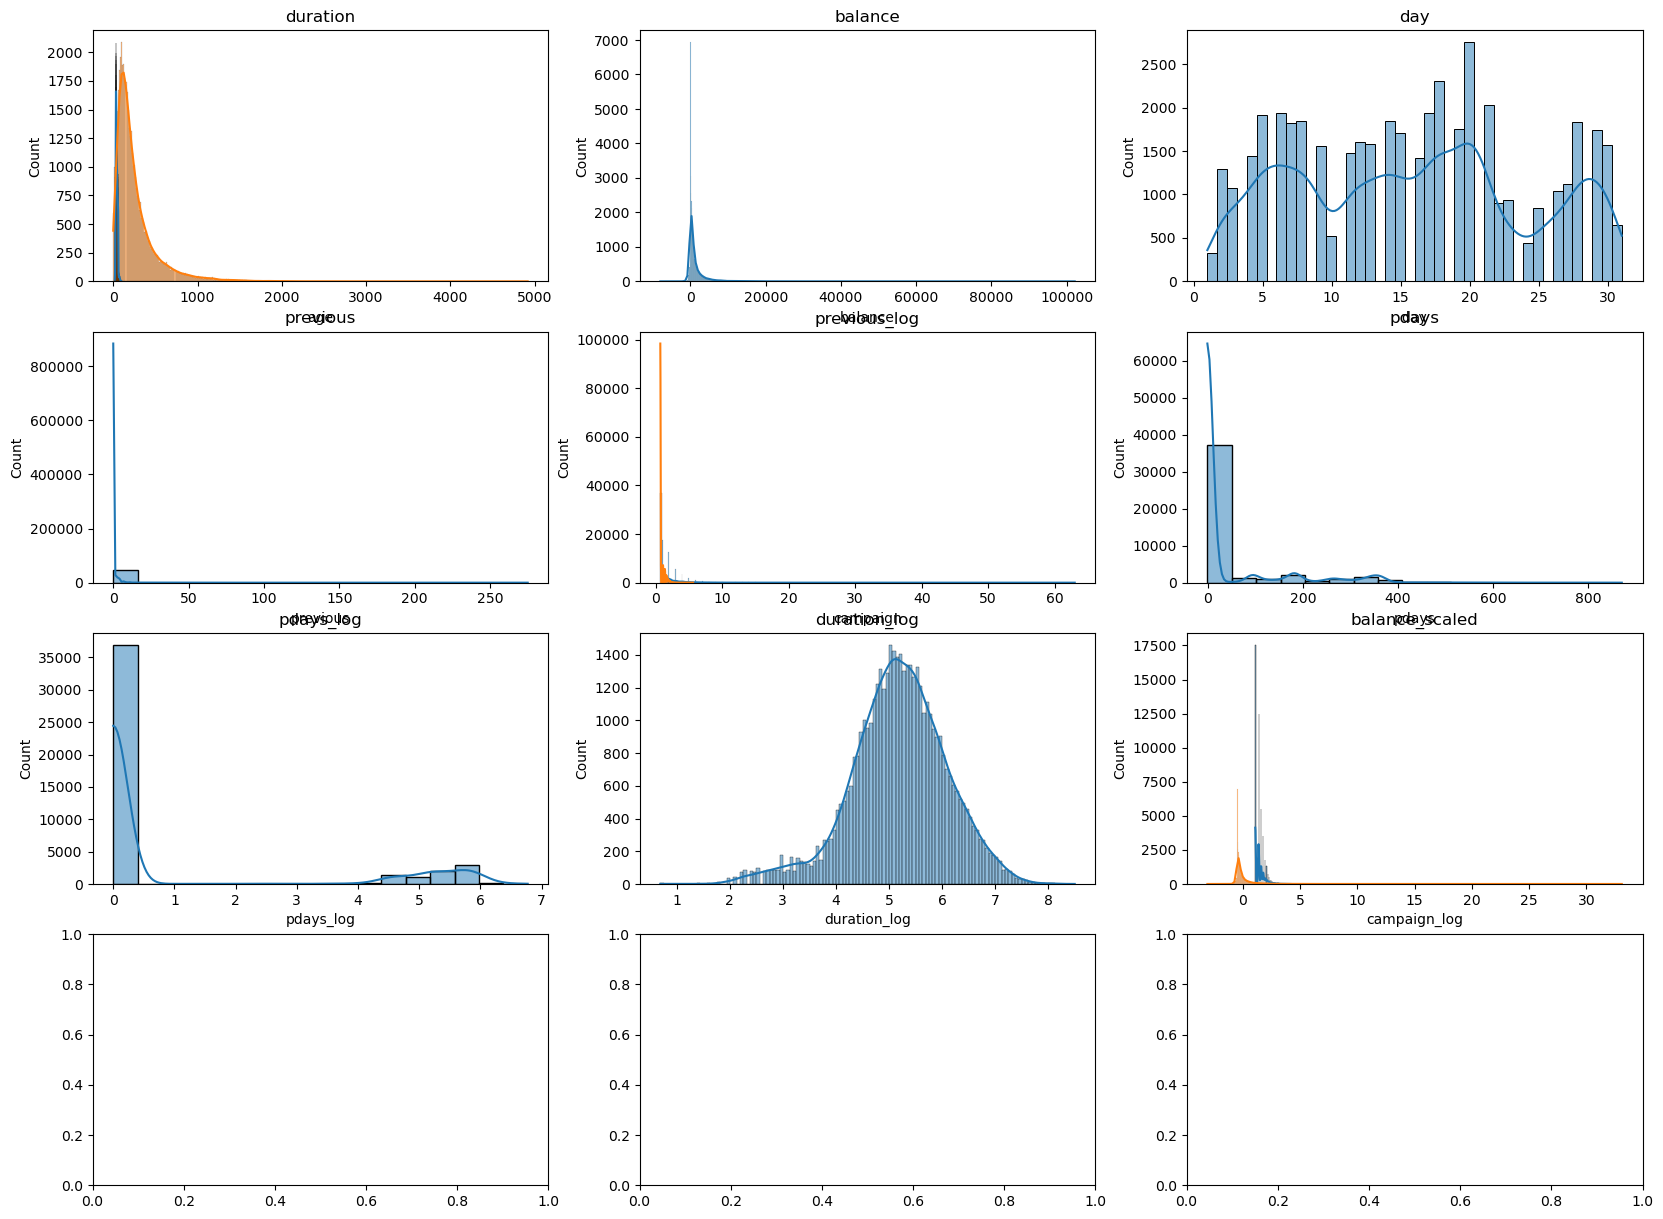

In [130]:
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
for i, col in enumerate(df2.select_dtypes(include=['int64', 'float64']).columns):
    sns.histplot(df2[col], kde=True, ax=axes[i//4, i%3])
    axes[i//4, i%3].set_title(col)

___
# **VII** - Data Split

In [136]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Obtener las clases únicas
classes = np.unique(y_train)

# Calcular los pesos automáticamente
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

# Pasar como diccionario
class_weights_dict = dict(zip(classes, weights))
print(class_weights_dict)

{'no': 0.5669676448457487, 'yes': 4.23314606741573}


In [140]:
model = LogisticRegression(class_weight=class_weights_dict)


In [141]:
X_train.sample(3)

,age,balance,day,duration,campaign,pdays,previous,previous_log,campaign_log,pdays_log,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
27726,32,232,13,232,1,-1,0,0.693147,1.098612,0.000000,...,False,False,False,False,False,False,False,False,False,True
11850,57,5,20,165,2,-1,0,0.693147,1.386294,0.000000,...,False,True,False,False,False,False,False,False,False,True
43584,49,1245,29,115,2,198,2,1.386294,1.386294,5.298317,...,False,False,False,False,False,False,False,False,False,False


In [157]:
print('{0:0.2f}% data is in training set'.format((len(X_train) /len(df2.index))*100))
print('{0:0.2f}% data is in test set'.format((len(X_test) /len(df2.index))*100))

70.00% data is in training set
30.00% data is in test set


In [143]:
print('Original response true values:       :   {0} ({1:0.2f}%)'.format(len(df2.loc[df2['y'] == 1]), (len(df2.loc[df2['y'] == 1]) / len(df2.index)) * 100))
print('Original response false values:      :   {0} ({1:0.2f}%)'.format(len(df2.loc[df2['y'] == 0]), (len(df2.loc[df2['y'] == 0]) / len(df2.index)) * 100))
print('Training response true values:       :   {0} ({1:0.2f}%)'.format(len(y_train.loc[y_train == 1]), (len(y_train.loc[y_train == 1]) / len(y_train.index)) * 100))
print('Training response false values:      :   {0} ({1:0.2f}%)'.format(len(y_train.loc[y_train == 0]), (len(y_train.loc[y_train == 0]) / len(y_train.index)) * 100))
print('Test response true values:           :   {0} ({1:0.2f}%)'.format(len(y_test.loc[y_test == 1]), (len(y_test.loc[y_test == 1]) / len(y_test.index)) * 100))
print('Test response false values:          :   {0} ({1:0.2f}%)'.format(len(y_test.loc[y_test == 0]), (len(y_test.loc[y_test == 0]) / len(y_test.index)) * 100))

Original response true values:       :   0 (0.00%)
Original response false values:      :   0 (0.00%)
Training response true values:       :   0 (0.00%)
Training response false values:      :   0 (0.00%)
Test response true values:           :   0 (0.00%)
Test response false values:          :   0 (0.00%)


_____

# **VIII** - Prueba Simple con Regresión Logística

- Al ser las respuestas 0 y 1, se tiene que la regresión logística es el modelo elegido.
- Se usa la librería 'LogisticRegression' para ejecutar la regresión.
- Se debe tener en cuenta que el modelo hace fit con el set de Training (X_train, Y_train).
- Y luego el modelo hace la predicción con el modelo de Test.

In [145]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight=class_weights_dict)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

c:\Users\danielortega\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [146]:
y_predict[0:100]

array(['no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no',
       'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no'], dtype=object)

In [147]:
z = X_test.copy()
z['Response real'] = y_test
z['Response predicción'] = y_predict
z[['Response real', 'Response predicción']].sample(10)

,Response real,Response predicción
24312,no,yes
30803,yes,no
28942,no,no
28874,no,no
11527,no,no
14619,yes,yes
16828,no,yes
29209,no,no
37171,no,yes
15883,no,no


In [148]:
coef_df = pd.DataFrame(model.coef_)
coef_df.columns = X_train.columns

coef_df['intercept'] = model.intercept_
coef_df.T

,0
age,0.006014
balance,0.000014
day,-0.008413
duration,0.006292
campaign,-0.039638
pdays,-0.006727
previous,0.099459
previous_log,-0.008518
campaign_log,-0.149100
pdays_log,0.461921


____
# **IX** - Matriz de Confusión

In [156]:
print(y_test.unique())
print(y_predict.unique())

[0, 1]
Categories (2, int64): [0, 1]


AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [ ]:
print(y_predict[:10])
print(y_predict.dtype)

['no' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no' 'yes']
object


In [ ]:
print(type(y_predict[0]))

<class 'str'>


C:\Users\danielortega\AppData\Local\Temp\ipykernel_14700\3331691722.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_predict = pd.Series(y_predict).replace({'no': 0, 'yes': 1})


Text(0.5, 1.0, 'Matriz de Confusión')

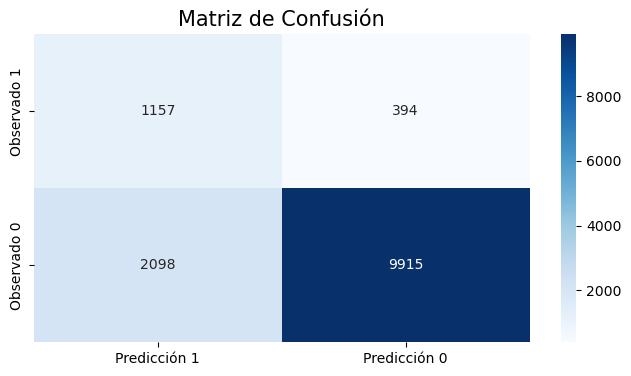

In [162]:
y_test = pd.Series(y_test).replace({'no': 0, 'yes': 1})
y_predict = pd.Series(y_predict).replace({'no': 0, 'yes': 1})

cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, 
                     index=['Observado 1', 'Observado 0'],
                     columns=['Predicción 1', 'Predicción 0'])

plt.figure(figsize=(8, 4))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d').set_title('Matriz de Confusión', size=15)


In [164]:
TP = df_cm.iloc[0, 0]  # Verdaderos Positivos
TN = df_cm.iloc[1, 1]  # Verdaderos Negativos
FP = df_cm.iloc[0, 1]  # Falsos Positivos
FN = df_cm.iloc[1, 0]  # Falsos Negativos

print(f'Verdaderos Positivos (TP): {TP}')
print(f'Verdaderos Negativos (TN): {TN}')
print(f'Falsos Positivos (FP): {FP}')
print(f'Falsos Negativos (FN): {FN}')

Verdaderos Positivos (TP): 1157
Verdaderos Negativos (TN): 9915
Falsos Positivos (FP): 394
Falsos Negativos (FN): 2098


In [167]:
# Convertir predicciones a 0/1
y_pred = pd.Series(y_pred).replace({'no': 0, 'yes': 1})

# Calcular métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model_score = accuracy_score(y_test, y_pred)
recall_val = recall_score(y_test, y_pred)
precision_val = precision_score(y_test, y_pred)
f1_val = f1_score(y_test, y_pred)
roc_val = roc_auc_score(y_test, y_pred)

print('Medidas de Precisión del Modelo:')
print('________________________')
print(f'Precisión del modelo: {model_score:.2f}')
print(f'Recall del modelo: {recall_val:.2f}')
print(f'Precisión del modelo: {precision_val:.2f}')
print(f'F1 Score del modelo: {f1_val:.2f}')
print(f'Roc Auc Score del modelo: {roc_val:.2f}')


Medidas de Precisión del Modelo:
________________________
Precisión del modelo: 0.82
Recall del modelo: 0.75
Precisión del modelo: 0.36
F1 Score del modelo: 0.48
Roc Auc Score del modelo: 0.79


C:\Users\danielortega\AppData\Local\Temp\ipykernel_14700\3405205258.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_pred = pd.Series(y_pred).replace({'no': 0, 'yes': 1})
